In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

In [3]:
df = pd.read_csv("C:/Users/Deepthi/Desktop/srikar/Uber-Jan-Feb-FOIL.csv")

In [4]:
df.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [5]:
df.tail()

,dispatching_base_number,date,active_vehicles,trips
349,B02764,2/28/2015,3952,39812
350,B02617,2/28/2015,1372,14022
351,B02682,2/28/2015,1386,14472
352,B02512,2/28/2015,230,1803
353,B02765,2/28/2015,747,7753


In [6]:
df.isnull().sum()

dispatching_base_number    0
date                       0
active_vehicles            0
trips                      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dispatching_base_number  354 non-null    object
 1   date                     354 non-null    object
 2   active_vehicles          354 non-null    int64 
 3   trips                    354 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.2+ KB


In [8]:
df.shape

(354, 4)

In [9]:
le.fit(df['date'].values)
df['date'] = le.transform(df['date'].values)

In [10]:
le.fit(df['dispatching_base_number'].values)
df['dispatching_base_number'] = le.transform(df['dispatching_base_number'].values)

In [11]:
df.head()

,dispatching_base_number,date,active_vehicles,trips
0,0,0,190,1132
1,5,0,225,1765
2,4,0,3427,29421
3,3,0,945,7679
4,2,0,1228,9537


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   dispatching_base_number  354 non-null    int32
 1   date                     354 non-null    int32
 2   active_vehicles          354 non-null    int64
 3   trips                    354 non-null    int64
dtypes: int32(2), int64(2)
memory usage: 8.4 KB


In [13]:
x = df.drop('trips',axis=1).values
y = df['trips'].values

In [14]:
x

array([[   0,    0,  190],
       [   5,    0,  225],
       [   4,    0, 3427],
       ...,
       [   3,   51, 1386],
       [   0,   51,  230],
       [   5,   51,  747]], dtype=int64)

In [15]:
y

array([ 1132,  1765, 29421,  7679,  9537,  6903,  4768,  7065,   875,
        5506,  1001, 19974,  1526, 10664,  7432,  8010,  1088, 29729,
         791,  5621,  5223,   993,  7729, 20441,   984,  6012,  7899,
       20926,  5798,  1133, 25301,  7491, 10128,  1376,  1314,  6816,
       11528,  9078, 29949,  1704,  1446,  8397,  1911, 10050,  1772,
       10416, 33802, 13462, 13165,  1560, 33517, 10477,  9538,  2039,
       11629, 13856, 10287,  1646, 38864,  2202,  1672,  7176,  8461,
       27681, 10932,  1104, 26852,  1711,  1399,  7915,  9107, 10662,
        1697,  8713, 11825,  1652, 29983,  9629, 29550,  1600,  8870,
        1582, 11965,  9762,  1636, 10391, 12539,  1797, 31214,  9152,
       12977,  2082, 34822, 11280,  1481,  9838,  9546,  1281, 11382,
        2160, 12676, 36318,  1521,  9443,  2287, 35182, 11161, 12879,
        7028,  7775,  1568, 22750,  1025,  5609,  7206,  8496,  1310,
       26137,  1608, 10015, 27344,  1519,  9472,  8041,  1774, 10997,
       12143, 30091,

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error

In [17]:
model = LinearRegression()

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [19]:
model.fit(x_train,y_train)

LinearRegression()

In [20]:
model.score(x_train,y_train)

0.9649576839555939

In [21]:
model.score(x_test,y_test)

0.9581611835606859

In [36]:
from sklearn.linear_model import Lasso

In [37]:
model2 = Lasso(alpha=20)

In [38]:
model2.fit(x_train,y_train)

Lasso(alpha=20)

model2.score(x_train,y_train)

In [39]:
model2.score(x_train,y_train)

0.9649563295274605

In [40]:
model2.score(x_test,y_test)

0.9581617727129271

In [41]:
y_pred = model.predict(x_test)

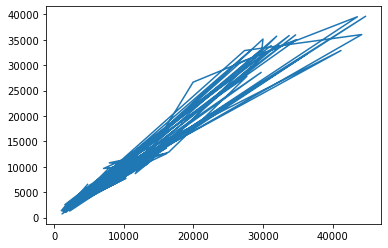

In [42]:
plt.plot(y_test,y_pred)

In [43]:
mean_squared_error(y_test,y_pred)

4840829.648306211